# Artist

This is the first in a series (hopefully) tutorials for my self and maybe others on how to use matplotlib library. As we all know graphs are an essential part of EDA and so many other important data analysis processes. So I figured it would be convienient for me to take some time and learn how to use this powerful but also some what complicated graphing library.

In this section we will cover `Artist` objects. This is a summary of the tutorial on the [matplotlib website].(https://matplotlib.org/3.2.1/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py)

### Introduction

First we must know that there are three layers to the matplotlib API. They are as follows:

* `FigureCanvas`: *matplotlib.backend_bases.FigureCanvas* is the area onto which the figure is drawn
* `Renderer`: *matplotlib.backend_bases.Renderer* is the object which know how to draw on the `FigureCanvas`.
* `Artist`: *matplotlib.artist.Artist* is the object that knows how to use a renderer to paint onto the canvas. 

The typical user (us) will spend 95% of our time working with `Artist` which is why we should learn all this stuff...

### Two Types of Artists
There are two types of Artists working at matplotlib inc..
1. **Primitives** are Line2D, Rectangle, Text, AxesImage, and all the other shapes.
2. **Containers** are the Axis, Axes and Figures that we place Primitives on.

Standard practice is to use `matplotlib.pyplot.figure()` to create *Figure* instances and connecting them with user interface or drawing toolkit *FigureCanvas*. This is strictly speaking not necessary, but we want to focus on `Artists` so lets use this for the time being.

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


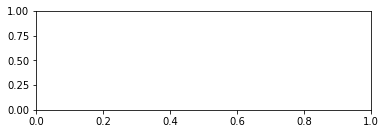

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

### Axes
`Axes` is probably the most important class in the matplotlib API (so make sure to take some time and learn how to manipulate them), because tthey decide where all of our stuff go. 

Axes has many helper methods that we have probably used many times such as (`plot()`, `text()`, `hist()`, `imshow()`) to create the most common graphics primitives
(`Line2D`, `Text`, `Rectangle`, `AxesImage`, respectivly). We should also be familiar with `Subplot`, which is a special case of an Axes that lives on a rows by columns grid of Subplot instances. If we wanted to created an Axes at an arbitrary location, use the `add_axes()` method which takes a list of \[left, bottom, width, height\] values in 0-1 relative figure coordinates

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

In [2]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

Remember we created an Axes instance ax above using the `fig.add_subplot` method. Now, when we call `ax.plot` it creates a `Line2D` instance and adds it to the `Axes.lines` list.

In [3]:
ax.lines[0]

At the moment, the ax.lines list has a length of 1 and contains the `Line2D` instance we created.

In [4]:
line

We can check that it is exactly the same line, returned to us by `ax.plot`. 

If we make subsequent calls to `ax.plot` while the "hold" state is on, then additional lines will be added to this list. We can remove the lines by simply using the list methods that are default in python.

In [ ]:
del ax.lines[0] 
ax.lines.remove(line) # use one not both!

The Axes also has helper methods to configure and decorate the x-axis and the y-axis tick, tick labels, and axis labels:

In [5]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

Each `Axes` instance also contain instances of `XAxis` and `YAxis` classes, which are responsible for handling tthe layout and drawing of the ticks, tick labels and axis labels. When we run `ax.set_xlabel` and `ax.set_ylabel` methods above, we pass `Text` objects to the XAxis and YAxis instances. 

Lets breakdown the following figure below with what we have learned.

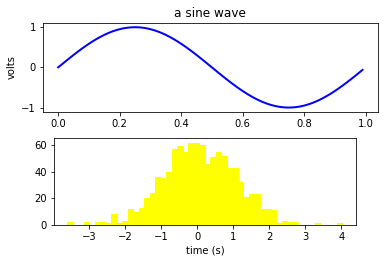

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure() # create a Figure instance
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211) # Add an Axes instance to figure at (two row, one col, first plot)
ax1.set_ylabel('volts') # Create and pass a Text instance to YAxes within Axes object
ax1.set_title('a sine wave')

# Generate our data
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2) # passing a Line instance to Axes

# Fixing random state for reproducibility 
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3]) # adding a Axes to an arbitrary location!
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow') # adding n, bins, and patches which I assume are objects to Axes
ax2.set_xlabel('time (s)')

plt.show() # Turn "hold" off!

### Customizing Objects

Every element in the figure is represented by a matplotlib `Artist`, and each has an extensive list of properties to configure its appearance. 

The figure itself contains a `Rectangle` exactly the size of the figure, which we can use to set the background color and transparency of the figures. This is stored in the member variable `Figure.patch`.

White box and black edges, i.e. bounding box, of `Axes` also has a `Rectangle` instance that controls color, transparency, and other properties of that Axes. This is stored in the member variable `Axes.patch`

**Fact**: The name "Patch" comes from MATLAB, and is a 2D "patch" of color on the figure, e.g., rectangle, circles and polygons.

Lets sort of recreate a `Artist` object below to show the properties it has.

In [20]:
class Artist:
    def __init__(self):
        self.alpha = 1 # The transparency (0~1)
        self.animated = True # A boolean that is used to facilitate animated drawing
        self.axes = None # The axes that the Artist lives in, possibly None
        self.clip_box = None # The bounding box that clips the Artist
        self.clip_on = False # Whether clipping is enabled
        self.clip_path = None # The path the artist is clipped to
        self.contains = None # A picking function to test whether the artist contains the pick point
        self.figure = None # The figure instance the artist lives in, possibly None
        self.label = None # A text label 
        self.picker = None # A python object that controls object picking
        self.transform = None # A transformation
        self.visible = True # A boolean whether the artist should be drawn
        self.zorder = 19 # A number that determines the drawing order
        self.rasterized = False # Truns vectors intto raster graphics (for compression & eps transparency)
    
    # There is a set_property and get_property method for each property
    def get_alpha(self):
        return self.alpha
    
    def set_alpha(self, alpha: float):
        self.alpha = alpha
        
    # There is a set method when we want to set multiple properties at once
    def set(self, alpha: float, zorder: int):
        self.alpha = alpha
        self.zorder = zorder

Each property is accessed in the "traditional" get and set methods. Which is very annoying but, matplotlib inc. is working on it.

In [21]:
o = Artist()
a = o.get_alpha()
o.set_alpha(0.5*a)

If we want to set a number of properties at once, there is a `set` method that does this

In [22]:
o.set(alpha=0.5, zorder=2)

If you are working interactively with a python shell, a very handy way to inspect the `Artist` properties is to use the `matplotlib.artist.getp()` function (simply `getp()` in pyplot), which lists the properties and their values. This works for classes derived from Artist as well, e.g., Figure and Rectangle. Here are the Figure rectangle properties mentioned above:

In [24]:
from matplotlib.artist import getp
getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = True
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfor

The docstrings for all of the classes also contain the Artist properties, so you can consult the interactive "help" or the matplotlib.artist for a listing of properties for a given object.

### Object containers